In [39]:

import geopandas
from geopandas import GeoDataFrame, GeoSeries
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
from shapely.geometry import Point, Polygon
import numpy as np
import googlemaps
from datetime import datetime
import json
plt.rcParams["figure.figsize"] = [8,6]


# The file here looks at all California Dept of Fires (CDF) data from 2020 onwards. Polygons are thus mostly limited to California.
fires = GeoDataFrame.from_file('./Interagency_Fire_Perimeter_History_-_All_Years (2)/InteragencyFirePerimeterHistory.shp')

# Here's how the data is looking like, for reference.


<AxesSubplot:>

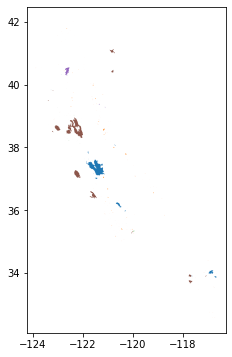

In [31]:
# FID looks like just the row numbers given after the filtering done on the dept end - nothing useful 
# Object ID may take into account the fact that we have filtered the data (some get skipped here and there).
fires = fires.set_index('FID')
fires = fires.sort_index()

# Plot and color by map_method. In other words, provide different colors for different classifications (e.g. blue for GPS Ground, red for Infrared)
# Not really needed, but interesting to see, and we can use this later in our analysis if needed.
fires.plot(column = 'MAP_METHOD')


[33.85868593477873, -116.6470528701483]
[33.85868593477873, -116.6756242987197]
[33.87093083273791, -116.6470528701483]
[33.87093083273791, -116.6756242987197]
[33.87093083273791, -116.7041957272911]
[33.88317573069709, -116.6756242987197]
[33.88317573069709, -116.7041957272911]
[33.89542062865628, -116.7041957272911]
[33.98113491437056, -116.7899100130054]
[33.98113491437056, -116.8184814415768]
[33.98113491437056, -116.8756242987197]
[33.98113491437056, -116.9327671558625]
[33.99337981232975, -116.7899100130054]
[33.99337981232975, -116.8184814415768]
[33.99337981232975, -116.8756242987197]
[33.99337981232975, -116.9041957272911]
[33.99337981232975, -116.9327671558625]
[34.00562471028893, -116.7899100130054]
[34.00562471028893, -116.8184814415768]
[34.00562471028893, -116.8470528701483]
[34.00562471028893, -116.8756242987197]
[34.00562471028893, -116.9041957272911]
[34.00562471028893, -116.9327671558625]
[34.01786960824811, -116.7899100130054]
[34.01786960824811, -116.8184814415768]


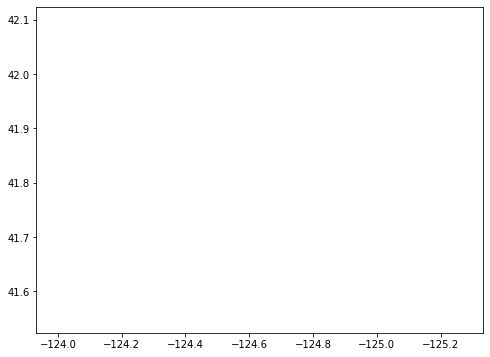

In [32]:
#California state boundaries

startx = -114.13276715586254
endx = -124.38498819727948
starty = 32.5239920572277
endy = 42.01477274871176

result = []

for x in np.arange(startx, endx, -1.4):
    boundx1 = x
    boundx2 = x - 1.4
    for y in np.arange(starty, endy, 0.6):
        boundy1 = y
        boundy2 = y + 0.6
        
        plt.gca().set_xlim([boundx1, boundx2])
        plt.gca().set_ylim([boundy1, boundy2])

# make a grid of latitude-longitude values
        xmin, xmax, ymin, ymax = boundx1, boundx2, boundy1, boundy2
        xx, yy = np.meshgrid(np.linspace(xmin,xmax,50), np.linspace(ymin,ymax,50))
        xc = xx.flatten()
        yc = yy.flatten()

# Now convert these points to geo-data - may take a few minutes to do at most.
        pts = GeoSeries([Point(x, y) for x, y in zip(xc, yc)])
        in_map =  np.array([pts.within(geom) for geom in fires.geometry]).sum(axis=0)
        pts = GeoSeries([val for pos,val in enumerate(pts) if in_map[pos]])


# We now have the points.

# (Reformat strings if needed to another type than the one given below - format rn is "Lat,Long")
        
        for n, point in enumerate(pts):
            c = []
            coords = [','.join(__ for __ in _.strip().split(' ')[::-1]) for _ in str(point).split('(')[1].split(')')[0].split(',')]
            coords = coords[0].split(',')
            c.append(float(coords[0]))
            c.append(float(coords[1]))
            result.append(c)


In [41]:
with open('coords.json', 'w') as f:
    json.dump(result, f)

1521
